In [12]:
import re
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import re
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy.ma as ma
BAD_VALUE = -999

In [4]:
def generate_dataset(name):
    
    with open(name) as f:
      lines = f.readlines()[7:]

    rain_array = []
    
    for line in lines:

        split_line = re.split(r'[\t\n]',line.strip())[1:]
        
        if ("** line too long **" in split_line[-1]):
            split_line.pop()
        
        split_line = list(map(lambda x : float(x) , split_line))
        
        while (len(split_line) < 1440):
            split_line.append(BAD_VALUE)
        
        rain_array.append(split_line)

    return np.array(rain_array)

In [8]:
def plot_contour_map1(data):
    contour_levels = [0,0.1,0.2,0.3,0.4,0.5]

    # Create contour map without colors
    contour_plot = plt.contour(data, levels=contour_levels, cmap='viridis', extend='both')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Contour Map Without Colors')
    plt.colorbar()
    plt.clabel(contour_plot, inline=True, fontsize=10)  # Add labels to contour lines
    plt.show()

In [13]:
def plot(data):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    cax = ax.imshow(data, origin='lower', cmap='viridis', extent=(-180,180,-90,90),transform=ccrs.PlateCarree(central_longitude=180),vmin=0, vmax=0.29)

    ax.add_feature(cfeature.COASTLINE)

    cbar = plt.colorbar(cax, ax=ax, orientation='vertical', label='Sea Surface Rain Amount')

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Sea Surface Rain Data')
    ax.set_extent([0,300,-90,90],ccrs.PlateCarree())
    # Display the map
    plt.show()

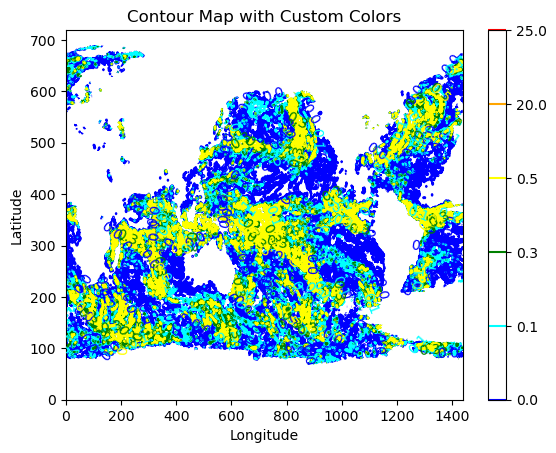

In [10]:
import matplotlib.colors as mcolors

def plot_contour_map3(data, custom_colors):
    contour_levels = [0, 0.1, 0.3, 0.5,20,25]

    # Create a custom colormap using LinearSegmentedColormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', custom_colors, N=len(contour_levels))

    # Create contour map with custom colors
    contour_plot = plt.contour(data, levels=contour_levels, colors=custom_colors)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Contour Map with Custom Colors')
    plt.colorbar(contour_plot, cmap=custom_cmap)  # Add a colorbar with the custom colormap
    plt.clabel(contour_plot, inline=True, fontsize=10)  # Add labels to contour lines
    plt.show()

# Example usage
custom_colors = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']  # Replace this with your actual data array
plot_contour_map3(masked_data, custom_colors)

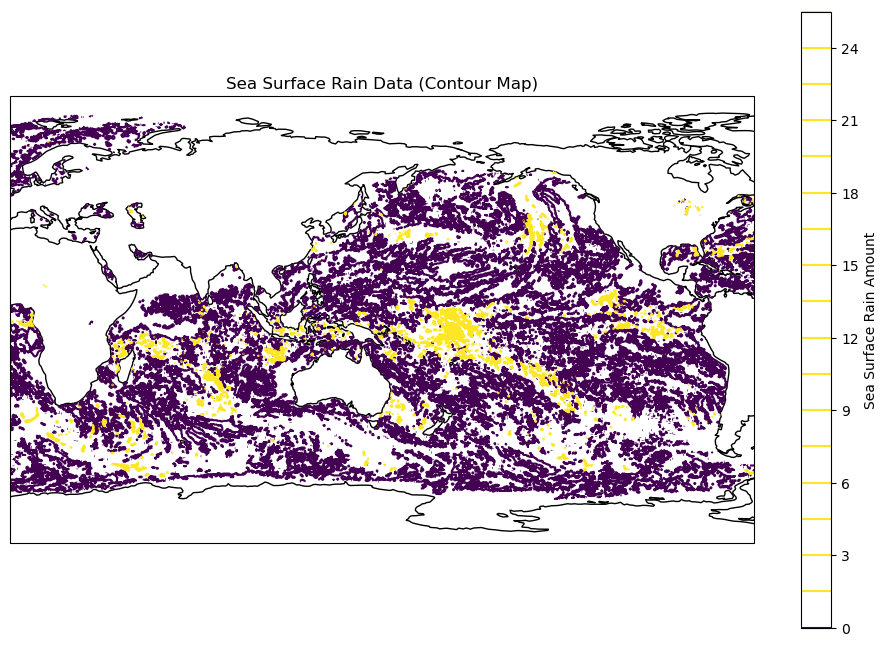

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_contour(data):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    # Create contour plot
    contour_levels = 20  # You can adjust the number of contour levels as needed
    contour_plot = ax.contour(data, contour_levels, origin='lower', cmap='viridis', extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180), vmin=0, vmax=0.29)

    ax.add_feature(cfeature.COASTLINE)

    cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical', label='Sea Surface Rain Amount')

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Sea Surface Rain Data (Contour Map)')
    ax.set_extent([0, 300, -90, 90], ccrs.PlateCarree())

    # Display the contour map
    plt.show()

# Example usage:
# Assuming you have your rain data in a variable called 'rain_data'
plot_contour(masked_data)

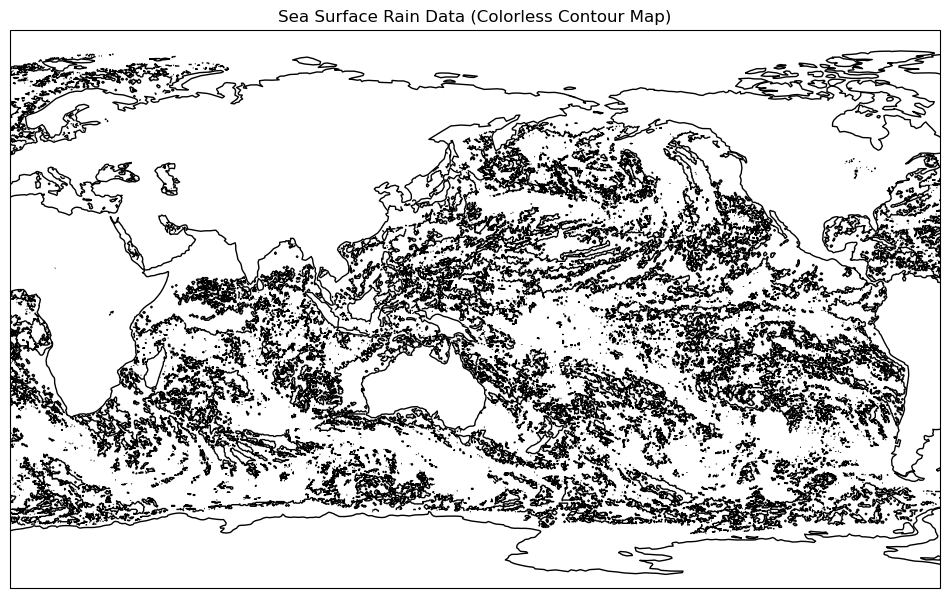

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_colorless_contour(data):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    # Create contour plot without color
    contour_levels = 100 # You can adjust the number of contour levels as needed
    contour_plot = ax.contour(data, contour_levels, origin='lower', colors='k', linewidths=1.0, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeature.COASTLINE)

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Sea Surface Rain Data (Colorless Contour Map)')
    ax.set_extent([0, 300, -90, 90], ccrs.PlateCarree())

    # Display the colorless contour map
    plt.show()

# Example usage:
# Assuming you have your rain data in a variable called 'rain_data'
plot_colorless_contour(masked_data)

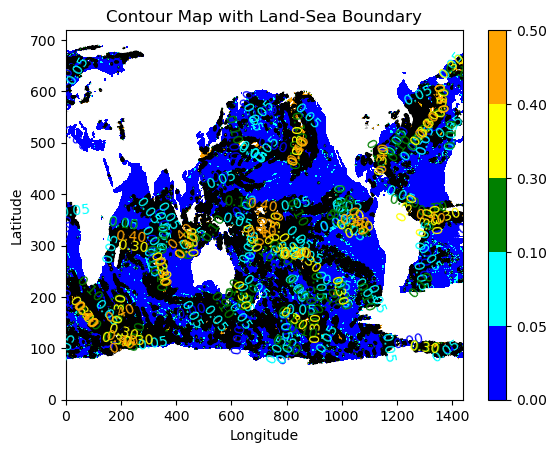

In [16]:
import matplotlib.colors as mcolors

def plot_contour_map_with_boundary(data, custom_colors):
    contour_levels = [0, 0.05, 0.1, 0.3, 0.4, 0.5]
    boundary_level = 0.1  # Set a contour level for the land-sea boundary

    # Create a custom colormap using LinearSegmentedColormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', custom_colors, N=len(contour_levels))

    # Create contour map with custom colors
    contour_plot = plt.contourf(data, levels=contour_levels, colors=custom_colors)

    # Add contour line for land-sea boundary
    plt.contour(data, levels=[boundary_level], colors='black', linewidths=2)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Contour Map with Land-Sea Boundary')
    plt.colorbar(contour_plot, cmap=custom_cmap)  # Add a colorbar with the custom colormap
    plt.clabel(contour_plot, inline=True, fontsize=10)  # Add labels to contour lines
    plt.show()

# Example usage
custom_colors = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red'] # Replace this with your actual data array
plot_contour_map_with_boundary(masked_data, custom_colors)


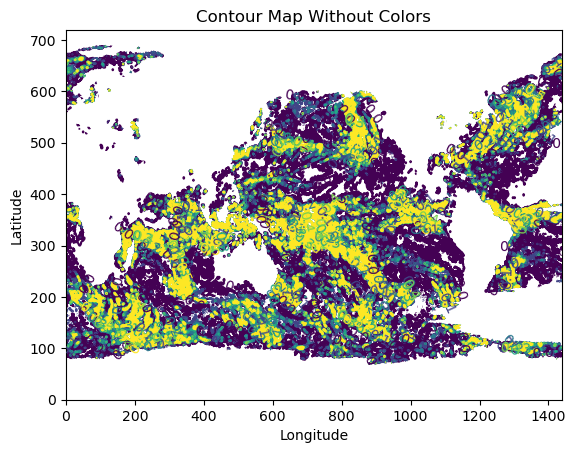

In [7]:
data = generate_dataset("1Apr2016.txt")
masked_data = ma.masked_where(data == BAD_VALUE, data)
plot_contour_map1(masked_data)

In [54]:
print(data.max())

25.0


/home/pramsai/anaconda3/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


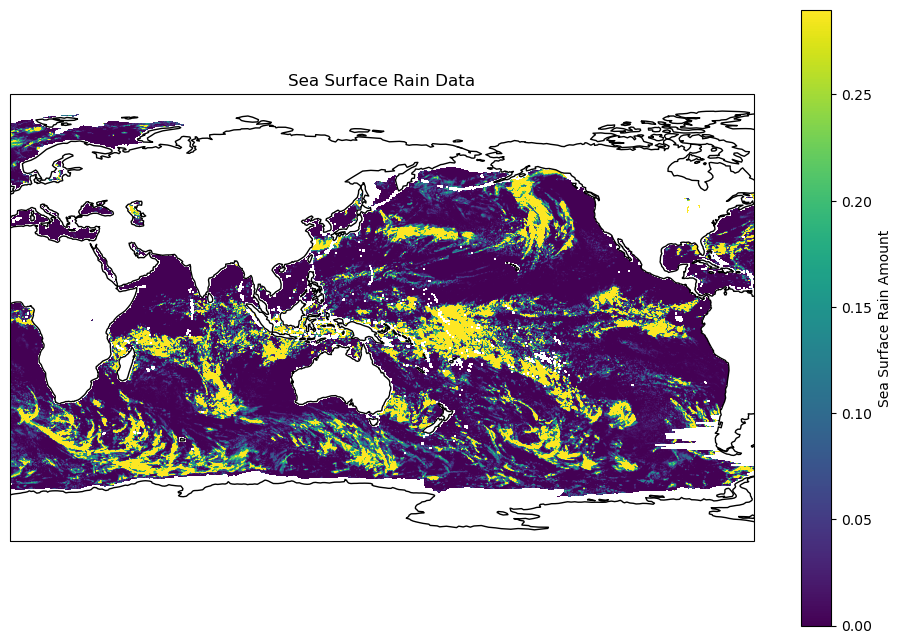

In [28]:
plot(data) 

In [47]:
print(data)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


In [35]:
print(data.min(),data.max())

0.0 25.0


In [37]:
print(data[0])

[-- -- -- ... -- -- --]
